In [7]:
# Generating data
from datetime import datetime,timezone
import os
import pickle
from lib_data_process import libDataProcess as dapr

KeyboardInterrupt: 

In [ ]:
azimut_mask = [265,340]
min_height = 2.5
max_height = 3.5
sample_rate = 1
snr_list = ['snr1','snr2','snr5','snr7','snr8']

path = os.path.abspath('../data/20220907/2')
st = datetime(year=2022,month=9,day=7,hour=8,minute=0,second=0,tzinfo=timezone.utc)
et = datetime(year=2022,month=9,day=7,hour=14,minute=0,second=0,tzinfo=timezone.utc)

for max_elevation in range(25,51):
    for t_range in range(15,46):
        elevation_mask = [5,max_elevation]
        dapr_case = dapr()
        ts_dict,count_ts = dapr_case.generate_timeseries(path, azimut_mask, elevation_mask, min_height, max_height, t_range, st, et, snr_list, sample_rate)
        result_dict = {'ts':ts_dict,'count':count_ts,'periodgram':dapr_case.power_list}
        with open(f'../data/generated_data/check_range/loop/normal_elevation{max_elevation}_timerange_{t_range}_check.pkl', 'wb') as f:
            pickle.dump(result_dict, f)

In [ ]:
azimut_mask = [265,340]
min_height = 2.5
max_height = 3.5
sample_rate = 1
snr_list = ['snr1','snr2','snr5','snr7','snr8']

path = os.path.abspath('../data/20230216/2_rotate')
st = datetime(year=2023,month=2,day=16,hour=13,minute=0,second=0,tzinfo=timezone.utc)
et = datetime(year=2023,month=2,day=16,hour=17,minute=0,second=0,tzinfo=timezone.utc)

# for max_elevation in range(30,61):
for max_elevation in range(46,52):
    for t_range in range(30,46):
        elevation_mask = [5,max_elevation]
        dapr_case = dapr()
        ts_dict,count_ts = dapr_case.generate_timeseries(path, azimut_mask, elevation_mask, min_height, max_height, t_range, st, et, snr_list, sample_rate)
        result_dict = {'ts':ts_dict,'count':count_ts,'periodgram':dapr_case.power_list}
        with open(f'../data/generated_data/check_range/loop2/normal_elevation{max_elevation}_timerange_{t_range}_check.pkl', 'wb') as f:
            pickle.dump(result_dict, f)

In [ ]:
import pickle

from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm


import lib_import_other_datasource as imoda

In [ ]:
plt.rcParams.update({'font.size': 12})

In [ ]:
ante_h = imoda.get_antenne_height('0907')['2']
mean_mat = np.zeros((26,31))
std_mat = np.zeros((26,31))
count_mat = np.zeros((26,31))
for i,max_elevation in enumerate((range(25,51))):
    for j,t_range in enumerate(range(15,46)):
        with open(f'../data/generated_data/check_range/loop/normal_elevation{max_elevation}_timerange_{t_range}_check.pkl', 'rb') as f:
            ts_dict = pickle.load(f)
            mean_mat[i,j] = ante_h-np.nanmean(np.asarray(list(ts_dict['ts'].values())))
            std_mat[i,j] = np.nanstd(np.asarray(list(ts_dict['ts'].values())))
            count_mat[i,j] = len(np.asarray(list(ts_dict['ts'].values())))


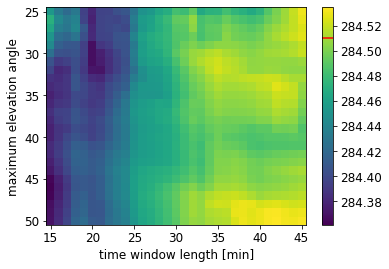

In [ ]:
fig,ax = plt.subplots()
im = ax.imshow(mean_mat)
cbar =fig.colorbar(im)
ax.set_xticks([0,5,10,15,20,25,30])
ax.set_xticklabels([15,20,25,30,35,40,45])
ax.set_yticks([0,5,10,15,20,25])
ax.set_yticklabels([25,30,35,40,45,50])
ax.set_xlabel('time window length [min]')
ax.set_ylabel('maximum elevation angle')
cbar.ax.plot([0,1],[284.51,284.51],'red')
#ax.set_title('Mean water surface height with\n different maximum elevation angle \n and time window length')
fig.savefig('../../write/bilder/kapitel4/check_mean.png',bbox_inches='tight')

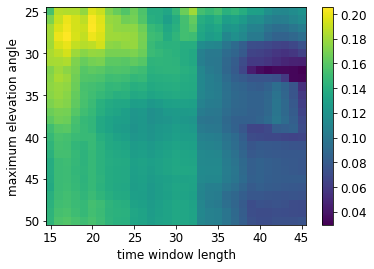

In [ ]:
fig,ax = plt.subplots()
im = ax.imshow(std_mat)
cbar =fig.colorbar(im)
ax.set_xticks([0,5,10,15,20,25,30])
ax.set_xticklabels([15,20,25,30,35,40,45])
ax.set_yticks([0,5,10,15,20,25])
ax.set_yticklabels([25,30,35,40,45,50])
ax.set_xlabel('time window length')
ax.set_ylabel('maximum elevation angle')
#ax.set_title('Standard deviation with\n different maximum elevation angle \n and time window length')
fig.savefig('../../write/bilder/kapitel4/check_std.png',bbox_inches='tight')

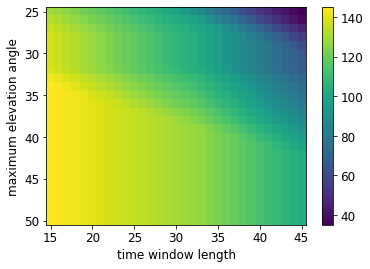

In [ ]:
xx = list(range(15,46))
fig,ax = plt.subplots()
im = ax.imshow(count_mat)
cbar =fig.colorbar(im)
ax.set_xticks([0,5,10,15,20,25,30])
ax.set_xticklabels([15,20,25,30,35,40,45])
ax.set_yticks([0,5,10,15,20,25])
ax.set_yticklabels([25,30,35,40,45,50])
ax.set_xlabel('time window length')
ax.set_ylabel('maximum elevation angle')
#ax.set_title('Number of valid height with\n different maximum elevation angle \n and time window length')
fig.savefig('../../write/bilder/kapitel4/check_count.png',bbox_inches='tight')

In [8]:
import pickle

from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm


import lib_import_other_datasource as imoda

In [9]:
plt.rcParams.update({'font.size': 12})
# ante_h = imoda.get_antenne_height('0216')['2']
#mean_mat = np.zeros((31,16))
std_mat = np.zeros((31,16))
count_mat = np.zeros((31,16))
for i,max_elevation in enumerate((range(30,61))):
    for j,t_range in enumerate(range(30,46)):
        with open(f'../data/generated_data/check_range/loop2/normal_elevation{max_elevation}_timerange_{t_range}_check.pkl', 'rb') as f:
            ts_dict = pickle.load(f)
            #mean_mat[i,j] = ante_h-np.nanmean(np.asarray(list(ts_dict['ts'].values())))
            std_mat[i,j] = np.nanstd(np.asarray(list(ts_dict['ts'].values())))
            count_mat[i,j] = len(np.asarray(list(ts_dict['ts'].values())))


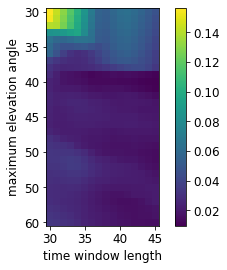

In [12]:
fig,ax = plt.subplots()
im = ax.imshow(std_mat)
cbar =fig.colorbar(im)
ax.set_xticks([0,5,10,15])
ax.set_xticklabels([30,35,40,45])
ax.set_yticks([0,5,10,15,20,25,30])
ax.set_yticklabels([30,35,40,45,50,50,60])
ax.set_xlabel('time window length')
ax.set_ylabel('maximum elevation angle')
#ax.set_title('Standard deviation with\n different maximum elevation angle \n and time window length')
fig.savefig('../../write/bilder/kapitel4/check_std2.png',bbox_inches='tight')

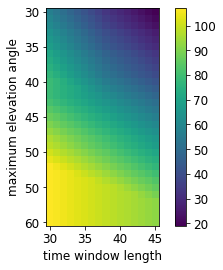

In [13]:
xx = list(range(15,46))
fig,ax = plt.subplots()
im = ax.imshow(count_mat)
cbar =fig.colorbar(im)
ax.set_xticks([0,5,10,15])
ax.set_xticklabels([30,35,40,45])
ax.set_yticks([0,5,10,15,20,25,30])
ax.set_yticklabels([30,35,40,45,50,50,60])
ax.set_xlabel('time window length')
ax.set_ylabel('maximum elevation angle')
#ax.set_title('Number of valid height with\n different maximum elevation angle \n and time window length')
fig.savefig('../../write/bilder/kapitel4/check_count2.png',bbox_inches='tight')